<a href="https://colab.research.google.com/github/mcnica89/Markov-Chains-RL-W24/blob/main/Weather_Markov_Chain_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=4,suppress=True) #will print everything to two decimal places with scientifc notation supressed

# The Problem

Consider the following Markov chain model for the weather, where each day it is either "rainy" (R) or "nice" (N). The weather for the coming days is a squence of random variables $S_1,S_2,S_3,\ldots$.

Rule 1. If it rains today, then it is rainy tomorrow with probability $\frac{2}{5}$ (and otherwise it is nice)

Rule 2. If it is nice today, then it rains tomorrow with probability $\frac{1}{5}$ (and otherwise it is nice)

If it rains today, (i.e. $S_0 = R$) then the probability it is raining three days from now is some fraction with a denominator of 125. Find the numerator: $\mathbf{P}(S_3 = R)= \frac{?}{125}$

(Answer: The probability is 32/125)


In [2]:
#The transition matrix
M = np.array([[0.4, 0.6],[0.2, 0.8]])
print(M)

[[0.4 0.6]
 [0.2 0.8]]


-------
Day: 0
Probabilities:  [1. 0.]
-------
Day: 1
Probabilities:  [0.4 0.6]
-------
Day: 2
Probabilities:  [0.28 0.72]
-------
Day: 3
Probabilities:  [0.256 0.744]
-------
Day: 4
Probabilities:  [0.2512 0.7488]
-------
Day: 5
Probabilities:  [0.2502 0.7498]
-------
Day: 6
Probabilities:  [0.25 0.75]
-------
Day: 7
Probabilities:  [0.25 0.75]
----Plot-----


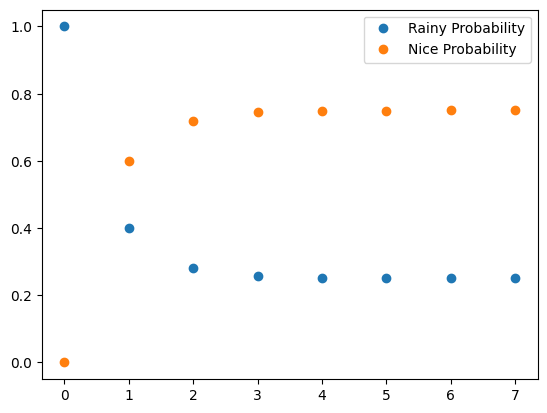

In [3]:
#initial probability vector
v0 = np.array([1.0,0.0])

#This list will store all the vectors in our simulation
v_list = []

N_days = 8 #Number of days to simulate
for n in range(N_days):
  print("-------")
  print("Day:", n)
  v = np.matmul(v0,np.linalg.matrix_power(M,n))
  print("Probabilities: ",v)
  v_list.append(v)

print("----Plot-----")
v_array = np.stack(v_list)
plt.plot(v_array,'o',label=["Rainy Probability","Nice Probability"])
plt.legend()

# Theoretical Solution by the Eigenvalue Decomposition

By using the eigenvalues $[1, 3] = [1, 3] M$ of eigenvalue $\lambda = 1$ and $[1, -1] = \frac{1}{5}[1, -1] M$ of eigenvalue $\lambda = \frac{1}{5}$, we got an exact answer:

$$\vec{p}_n = [1, 0]M^n = [\frac{1+\frac{3}{5^n}}{4}, \frac{3-\frac{3}{5^n}}{4}]$$

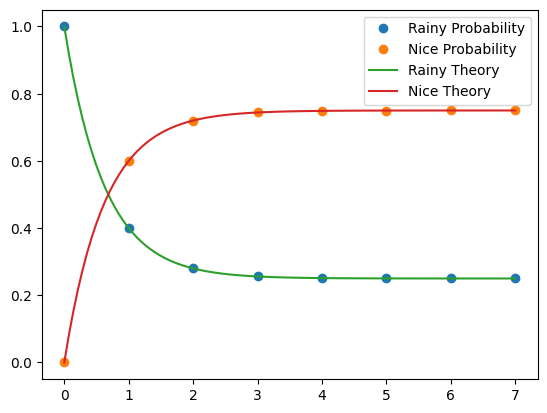

In [4]:
N = np.linspace(0,7,100)
pows = np.power(0.2,N)
f = np.stack( [(1+3*pows)/4,(3-3*pows)/4] ).T

plt.plot(v_array,'o',label=["Rainy Probability","Nice Probability"])
plt.plot(N,f,label=['Rainy Theory','Nice Theory'])
plt.legend()

# Computing Eigenvectors and Eigenvalues in Numpy

You can make the computer calculate these eigenvector/eigenvalues and use that to get exact formulas or find the limiting distribution.

Note that by default numpy finds the right eigenvectors (i.e. it finds $\vec{v}$ so that $M\vec{v} = \lambda \vec{v}$. To make the eigenvectors meaningful as probabilities we want the left eigenvectors (i.e. $\vec{p} M = \lambda \vec{p}$. To make numpy do this we simply take the transpose everywhere (taking the transpose changes the order of multiplication (i.e. $(AB)^T=B^T A^T$)

In [9]:
#use the fact that in the limit all the eigenvalues that are strictly < 1 will vanish

eigenvalues, eigenvectors = np.linalg.eig(M.T) #use M transpose to get the left eigenvectors
print(f"{eigenvalues=}")
print(f"{eigenvectors=}")


M_eig = np.linalg.inv(eigenvectors.T) @ np.diag(eigenvalues.T) @ eigenvectors.T
 #this is the eigen decomposition of the transition matrix
 # Note that traditionally the order is the other way E D E^{-1}. It is swiched here again because of the left eigenvalue thing.

print(f"{np.allclose(M_eig,M)=}") #The M_eig matrix is exactly the matrix M again, but you can manipualte the eigenvalues now!



eigenvalues=array([0.2, 1. ])
eigenvectors=array([[-0.7071, -0.3162],
       [ 0.7071, -0.9487]])
np.allclose(M_eig,M)=True
rounded_eigs=array([0., 1.])
LimitingTransitionMatrix=array([[0.25, 0.25],
       [0.75, 0.75]])


You can use the eigedecompositon to e.g. find powers of the matrix:

$$M = E^{-1} D E  \implies M^k = E^{-1} D^k E$$

In [12]:
#Find an exact formula for M^n using the eigenvalues
#formula for M**t can be read off by just taking the eigenvalues to the power t

k = 10 #which power you want
M_to_the_k_eig = np.linalg.inv(eigenvectors.T) @ np.diag(eigenvalues.T**k) @ eigenvectors.T

print(f"{np.allclose(M_to_the_k_eig,np.linalg.matrix_power(M,k))=}") #This reconstructs the matrix to a power but you can see how it works!

np.allclose(M_to_the_k_eig,np.linalg.matrix_power(M,k))=True


You can also use this to find the limit $\lim_{k\to\infty}M^k$ since the all the eigenvalues are $|\lambda|\leq $ so:

$$\lim_{k\to\infty}\lambda^k = \begin{cases} 1 \text{ if }\lambda=1 == 0 \\ 0 \text{ if }|\lambda|<1 \end{cases}$$

In [16]:
#Use the eigendecomposition to find the limiting values

#round all the eigenvalues which are |lambda|<1 down to 0. Keep any that are =1 as 1
limiting_eigs = 1.0*np.isclose(eigenvalues,1.0)
#this is equivalent to rounded_eigs[k] = 1.0 if eigenvalues[k]==1 and rounded_eigs[k] = 0.0 if not.


print(f"{limiting_eigs=}")

LimitingTransitionMatrix = np.linalg.inv(eigenvectors.T) @  np.diag(limiting_eigs) @ eigenvectors.T  #this is the eigen decomposition of the transition matrix
print(f"{LimitingTransitionMatrix=}")
print(f"{np.linalg.matrix_power(M,1000)=}")


limiting_eigs=array([0., 1.])
LimitingTransitionMatrix=array([[0.25, 0.75],
       [0.25, 0.75]])
np.linalg.matrix_power(M,1000)=array([[0.25, 0.75],
       [0.25, 0.75]])


# Steady State Probability Distribution


If you just try to solve $\vec{p} = \vec{p}M$ you get a non-helpful solution

In [6]:
IminusM = np.eye(2)-M
p_steady_state_not_helpful = np.linalg.solve(IminusM,np.zeros(2)) #this just finds the solution [0,0] which is not helpful
print(p_steady_state_not_helpful)

[ 0. -0.]



The steady state probability distribution satisifes $\vec{p} = \vec{p} M$. (i.e. its an eigenvector of eignevalue $1$). If the Markov chain is irreducible then we have $\lim_{n\to \infty} \vec{p}_0 M^n$ always converges to this!

Note that to solve this on a computer we rearrange the equation to:
$$\vec{p}(I - M) = \vec{0}$$
and then take the transpose to get:
$$(I-M)^T\vec{p}^T = \vec{0}$$
(This is because computer algebra systems normally use column vectors, not row vectors)

We also need to add the extra condtion that $\sum p_i = 1$ (i.e. its a probability vector). Otherwise the computer cannot find the solution because there is no unique solution (any scalar multiple will satify it too). To do this we augment (i.e. takc on) an extra column of all 1's to our matrix. This encodes the equation:

$$\vec{p} \begin{bmatrix} 1 \\ 1 \end{bmatrix} = 1$$

In [7]:
IminusM = np.eye(2)-M
my_ones = np.ones((2,1))
aug = np.concatenate((my_ones,IminusM),axis=1) #add a conditon on the sum of the entries of p
p_steady_state = np.linalg.lstsq(aug.T,np.array([1,0,0]),rcond=None)[0] #find solution to (AugMatrix)p^T = [1,0,0]^T which is our linear system
p_steady_state

array([0.25, 0.75])